In [1]:
from src.solarsys import System, G, AU, T, M
import numpy as np
from tqdm.notebook import tqdm

In [2]:
import matplotlib.animation as animation
from IPython.display import HTML

from mpl_toolkits.mplot3d import Axes3D
from src.animate import Animate_Icon

# Define binary system

In [3]:
# Define planets
m_sun = 1
m_earth = 5.97219 * 10 **24 / M

p_sun = [0,0,0]
v_sun = [0,0,0]

p_earth = [1, 0, 0]
v_earth = [0, np.sqrt(G), 0]

In [4]:
# Define system
m_in = np.array([m_sun, m_earth])
p_in = np.array([p_sun, p_earth])
v_in = np.array([v_sun, v_earth])

bin_sys = System(n=2, dt=0.1, m_in=m_in, p_in=p_in, v_in=v_in, sun_static=True)

# Test Energy conservation

In [5]:
n_days = 365
n_years = 100
U = np.zeros(shape=(n_years,1))
K = np.zeros(shape=(n_years,1))

for i in tqdm(range(n_years)):
    bin_sys.motion(10 * n_days)
    U[i] = bin_sys.U
    K[i] = bin_sys.K

  0%|          | 0/100 [00:00<?, ?it/s]

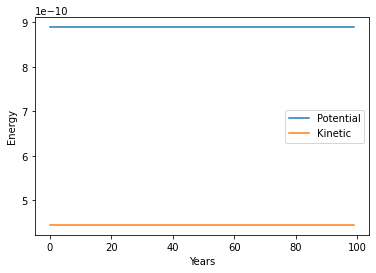

In [6]:
import matplotlib.pyplot as plt
plt.plot(U, label='Potential')
plt.plot(K, label='Kinetic')
plt.xlabel('Years')
plt.ylabel('Energy')
plt.legend();

# Test trajectory

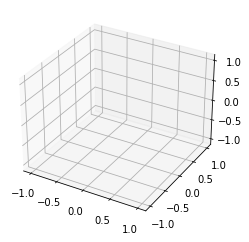

In [7]:
# Set Figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1]);

In [8]:
# Initialize system
bin_sys.reset()
traj_len = 365 # one year

In [9]:
# Creating the Animation object
an = Animate_Icon(ax=ax, system=bin_sys, n_steps=traj_len)
ani = animation.FuncAnimation(
    fig, an, frames=traj_len, interval=50, blit=False, repeat=True)

HTML(ani.to_html5_video())